In [137]:
from sklearn.cluster import KMeans  #algorithm in sklearn library to do k-means clustering

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


%matplotlib inline

In [138]:
#use dataset with
location = "datasets/CC GENERAL.csv"
df = pd.read_csv(location)

#in this dataframe, features 1 & 2 are the characteristics of each data point (predictive features) 
#C is the target variable (categories to predict)
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [139]:
df.columns

Index(['CUST_ID', 'BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES',
       'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE',
       'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY',
       'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY',
       'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS',
       'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE'],
      dtype='object')

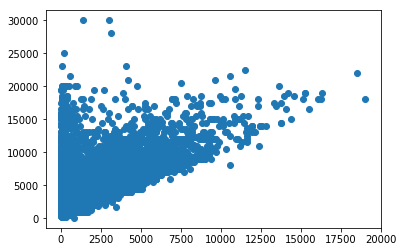

In [142]:
#plot data points to visually see where they are
#on small and distinctive dataset, easier to see clusters
plt.scatter(df['BALANCE'],df['CREDIT_LIMIT'])

In [143]:
#Define bins as -1-4999, 5000-9999, 10000-14999, 15000-19999
bins = [-1, 5000, 10000, 15000, 20000]

# Create names for the four groups
group_names = [1, 2, 3, 4]

#make new column with letter grades
df['Balance_Group'] = pd.cut(df['BALANCE'], bins, labels=group_names)
df['Balance_Group'].head()

0    1
1    1
2    1
3    1
4    1
Name: Balance_Group, dtype: category
Categories (4, int64): [1 < 2 < 3 < 4]

In [144]:
X.isnull().sum()

BALANCE         0
CREDIT_LIMIT    0
dtype: int64

In [145]:
#X['CREDIT_LIMIT'].loc[X['CREDIT_LIMIT'].isnull()==True]=1000

In [146]:
df['Balance_Group'].value_counts()

1    8268
2     616
3      57
4       9
Name: Balance_Group, dtype: int64

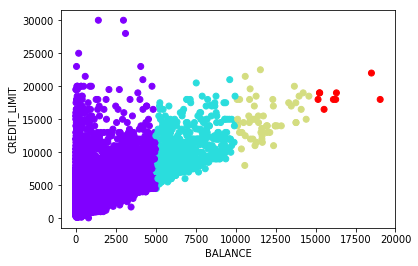

In [147]:
plt.xlabel('BALANCE')
plt.ylabel('CREDIT_LIMIT')
plt.scatter(df['BALANCE'], df['CREDIT_LIMIT'], c=df['Balance_Group'], cmap='rainbow')

<function matplotlib.pyplot.show(*args, **kw)>

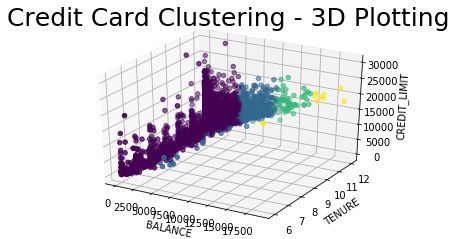

In [156]:
fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')
ax.set_xlabel('BALANCE')
ax.set_ylabel('TENURE')
ax.set_zlabel('CREDIT_LIMIT')
ax.set_title("Credit Card Clustering - 3D Plotting", fontsize=25, fontweight=3)
ax.scatter(df['BALANCE'], df['TENURE'], df['CREDIT_LIMIT'], c=df['Balance_Group'], marker='o')
plt.show

In [90]:
X = df.drop(['CUST_ID', 'BALANCE_FREQUENCY', 'PURCHASES',
       'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE',
       'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY',
       'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY',
       'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'PAYMENTS',
       'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE','Balance_Group'], axis=1)
X.head()

,BALANCE,CREDIT_LIMIT
0,40.900749,1000.0
1,3202.467416,7000.0
2,2495.148862,7500.0
3,1666.670542,7500.0
4,817.714335,1200.0


In [91]:
Y = df['Balance_Group']
Y.head()

0    1
1    1
2    1
3    1
4    1
Name: Balance_Group, dtype: category
Categories (4, int64): [1 < 2 < 3 < 4]

In [92]:
kmeans = KMeans(n_clusters=4)

In [93]:
X.loc[X['CREDIT_LIMIT'].isnull()==True]

,BALANCE,CREDIT_LIMIT
5203,18.400472,NaN


In [94]:
X['CREDIT_LIMIT'].loc[X['CREDIT_LIMIT'].isnull()==True]=1000

In [95]:
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [96]:
print(kmeans.cluster_centers_)

[[  780.67336884  2135.01812495]
 [ 1956.28155687  6330.3054633 ]
 [ 1271.49609604 12453.0651341 ]
 [ 7465.44404359 11344.32809773]]


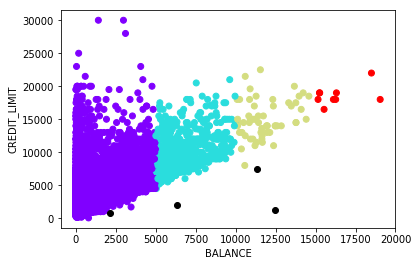

In [97]:
plt.xlabel('BALANCE')
plt.ylabel('CREDIT_LIMIT')

plt.scatter(df['BALANCE'], df['CREDIT_LIMIT'], c=df['Balance_Group'], cmap='rainbow')

#plot x, y axis coordinates for centroids
plt.scatter(kmeans.cluster_centers_[:,1], kmeans.cluster_centers_[:,0], c='black')

In [157]:
X1 = df.drop(['CUST_ID', 'BALANCE_FREQUENCY', 'PURCHASES',
       'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE',
       'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY',
       'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY',
       'CASH_ADVANCE_TRX', 'CREDIT_LIMIT', 'PAYMENTS',
       'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE','Balance_Group'], axis=1)
X1.head()

,BALANCE,PURCHASES_TRX
0,40.900749,2
1,3202.467416,0
2,2495.148862,12
3,1666.670542,1
4,817.714335,1


In [158]:
X1.isnull().sum()

BALANCE          0
PURCHASES_TRX    0
dtype: int64

In [159]:
kmeans = KMeans(n_clusters=4)

In [160]:
kmeans.fit(X1)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [161]:
print(kmeans.cluster_centers_)

[[9410.41902283   30.98023715]
 [2126.13165452   14.97498922]
 [5054.43164644   19.23119469]
 [ 387.56086586   13.09883084]]


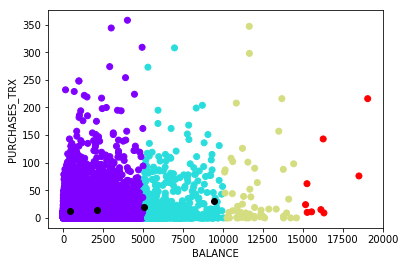

In [162]:
plt.xlabel('BALANCE')
plt.ylabel('PURCHASES_TRX')

plt.scatter(df['BALANCE'], df['PURCHASES_TRX'], c=df['Balance_Group'], cmap='rainbow')

#plot x, y axis coordinates for centroids
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], c='black')

In [163]:
X2 = df.drop(['CUST_ID', 'BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES',
       'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE',
       'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY',
       'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY',
       'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'PAYMENTS',
       'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT','Balance_Group'], axis=1)

In [164]:
X2.isnull().sum()

CREDIT_LIMIT    1
TENURE          0
dtype: int64

In [165]:
X2['CREDIT_LIMIT'].loc[X2['CREDIT_LIMIT'].isnull()==True]=1000

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [166]:
kmeans = KMeans(n_clusters=4)

In [167]:
kmeans.fit(X2)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [168]:
print(kmeans.cluster_centers_)

[[9.18456267e+03 1.17290605e+01]
 [1.92344215e+03 1.13379524e+01]
 [5.33452475e+03 1.17133838e+01]
 [1.54009563e+04 1.18196721e+01]]


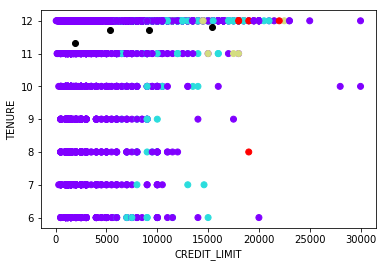

In [170]:
plt.xlabel('CREDIT_LIMIT')
plt.ylabel('TENURE')

plt.scatter(df['CREDIT_LIMIT'], df['TENURE'], c=df['Balance_Group'], cmap='rainbow')

#plot x, y axis coordinates for centroids
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], c='black')